In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import cPickle as pickle
from Scraping_Data import Movie, Genre
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

True


/Users/RickS/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Because this is the first time scraped a full dataset from the web, the scraping process and results are quite messy and inneficient. This could be avoided by cleaner scraping methods (and just good ol practice).

In [2]:
# THIS TAKES A LONG TIME


genre_objects = []
with open('Pickle_Files/genre_objects.pkl', 'rb') as f:
    genre_objects = pickle.load(f)



# To clean this up you need to redo Scraping_Data.py, to just go through all the movies (not from the genres page)
# and then pickle all_movies

In [3]:
# # extra work now...
all_movies = []
for gnr in genre_objects:
    for mov in gnr.movies:
        if mov in all_movies:
            continue
        else: all_movies.append(mov)


movie_data = [mv.data for mv in all_movies]
len(movie_data)

6197

In [ ]:
# THESE ARE BROKEN

d1 = map(lambda m: m.data['Title'], all_movies).index('My Mother Likes Women')

del(all_movies[d1])
 
d2 = map(lambda m: m.data['Title'], all_movies).index('Like Father, Like Son')
del(all_movies[d2])

In [13]:
# # MAKE A BIG OLD DF FROM MOVIE DATA
movie_df = pd.DataFrame(movie_data)
print movie_df.shape
print 

movie_df.replace(['n/a', 'N/A','-','[]',''], np.nan, inplace=True)
print movie_df.isnull().sum()
print
print movie_df.dropna().shape # YIKES


(6197, 15)

Actors                  1844
Directors               3004
Foreign_Gross           2655
Genres                     0
Gross_Domestic            84
Gross_Opening_Week       363
Opening_Num_Theaters     341
Production_Budget       3793
Rank                      84
Release_Date               0
Runtime                   61
Studio                     9
Title                      0
Total_Gross             2654
Total_Theaters           346
dtype: int64

(1608, 15)


### NA Filling

In [3]:
# # GET RID OF PRODUCTION BUDGET - TOO MANY NULLS :(
print movie_df.drop('Production_Budget', axis = 1).dropna().shape # better
movie_df.drop('Production_Budget', axis = 1, inplace = True)

movie_df.dropna(inplace = True)
print movie_df.shape
movie_df.head(10)

(2209, 14)
(2209, 14)


,Actors,Directors,Foreign_Gross,Genres,Gross_Domestic,Gross_Opening_Week,Opening_Num_Theaters,Rank,Release_Date,Runtime,Studio,Title,Total_Gross,Total_Theaters
0,"[Tobey Maguire, Jeff Bridges, Chris Cooper, El...",[Gary Ross],"$28,058,591","[Horse, Sports - Period, Sports Drama, Drama -...","$120,277,854","$20,854,735","1,989",1,2003-07-25 00:00:00,2 hrs. 9 min.,Uni.,Seabiscuit,"$148,336,445","2,573"
1,"[Benedict Cumberbatch, Tom Hiddleston, David T...",[Steven Spielberg],"$97,700,000","[Horse, Family - Children's Book Adaptation, W...","$79,884,879","$7,515,402","2,376",2,2011-12-25 00:00:00,2 hrs. 26 min.,BV,War Horse,"$177,584,879","2,856"
2,"[Robert Redford, Kristin Scott Thomas, Sam Nei...",[Robert Redford],"$111,500,000","[Horse, Romantic Drama, Drama - Summer]","$75,383,563","$13,685,488","2,039",3,1998-05-15 00:00:00,2 hrs. 49 min.,BV,The Horse Whisperer,"$186,883,563","2,362"
3,[],[Kelly Asbury],"$49,283,422",[Horse],"$73,280,117","$17,770,036","3,317",4,2002-05-24 00:00:00,1 hrs. 22 min.,DW,Spirit: Stallion of the Cimarron,"$122,563,539","3,362"
4,[Viggo Mortensen],[Joe Johnston],"$40,800,000","[Horse, Adventure - Period, Adventure - Desert]","$67,303,450","$18,829,435","3,063",5,2004-03-05 00:00:00,2 hrs. 16 min.,BV,Hidalgo,"$108,103,450","3,065"
6,"[Diane Lane, John Malkovich, Scott Glenn, Jame...",[Randall Wallace],"$537,416","[Horse, Sports - Period, Sports Drama, That '7...","$59,713,955","$12,694,770","3,072",7,2010-10-08 00:00:00,1 hrs. 56 min.,BV,Secretariat,"$60,251,371","3,108"
7,"[Frankie Muniz, Mandy Moore, Hayden Panettiere...","[Frederik Du Chau, Frederik Du Chou]","$40,981,953","[Horse, Family - Talking Animal (Live action)]","$49,772,522","$13,920,052","3,185",8,2005-01-14 00:00:00,1 hrs. 24 min.,WB,Racing Stripes,"$90,754,475","3,185"
32,[Sylvester Stallone],[Sylvester Stallone],"$172,600,000","[Sports - Boxing, Sports Drama, Christmas - Se...","$127,873,716","$19,991,537","1,325",1,1985-11-27 00:00:00,1 hrs. 31 min.,UA,Rocky IV,"$300,473,716","2,254"
35,"[Sylvester Stallone, Tessa Thompson]",[Ryan Coogler],"$63,800,000","[Sports - Boxing, Sports Drama]","$109,767,581","$29,632,823","3,404",4,2015-11-25 00:00:00,2 hrs. 13 min.,WB (NL),Creed,"$173,567,581","3,502"
36,"[Clint Eastwood, Hilary Swank, Morgan Freeman,...",[Clint Eastwood],"$116,271,443","[Sports - Boxing, Disability - Paraplegic / Qu...","$100,492,203","$179,953",8,5,2004-12-15 00:00:00,2 hrs. 17 min.,WB,Million Dollar Baby,"$216,763,646","2,375"


In [4]:
# REORDER COLUMNS
movie_df.columns

movie_df['Release_Month'] = movie_df.Release_Date.dt.month


# drop rank
col_order = [u'Title', u'Release_Date', 'Release_Month', u'Genres', u'Actors', u'Directors', u'Studio', u'Runtime', 
 u'Foreign_Gross' , u'Gross_Domestic',u'Total_Gross', u'Gross_Opening_Week',
 u'Opening_Num_Theaters', u'Total_Theaters']


movie_df = movie_df[col_order]

# Rename Some Columns
col_names = [u'Title', "Release_Date",'Release_Month', u'Genres', u'Actors', u'Directors', u'Studio', u'Runtime', 
 u'Foreign_Gross' , u'Domestic_Gross',u'Total_Gross', u'Opening_Week_Gross',
 u'Opening_Num_Theaters', u'Total_Theaters']

movie_df.columns = col_names

# reset Index so Sequential
movie_df.reset_index(drop = True, inplace=True)

### Convert Dtypes

In [17]:

movie_df.dtypes

Title                           object
Release_Date            datetime64[ns]
Release_Month                    int64
Genres                          object
Actors                          object
Directors                       object
Studio                          object
Runtime                          int64
Foreign_Gross                  float64
Domestic_Gross                 float64
Total_Gross                    float64
Opening_Week_Gross             float64
Opening_Num_Theaters           float64
Total_Theaters                 float64
dtype: object

In [6]:
# need to convert:
    # Release_Date --> Datetime
    # Runtime --> minutes
    # Foreign_Gross, Domestic_Gross, Total_Gross, Opening_Week_Gross, Country_Total_Gross --> number
    # Opening_Num_Theaters, Total_Theaters --> Num
    # Actors, Directors, Genres, Country, Studio --> Dummy

    
def parse_runtime(string):
    # converts to total minutes
    hrs, mins = re.findall(r'(\d+) hrs\D*(\d+) min', string)[0]
    hrs = int(hrs)
    mins = int(mins)
    return hrs*60 + mins


def str_to_float(string):
    '''
    Convert string to floats
    eg str_to_float('2.25') -> 2.25
        str_to_float('0.234') --> 0.234
        str_to_float('-213') --> -213
    '''
    pos = True
    d_point = -1
    exp = 0
    # get rid of commas, and dollar signs
    string = string.replace(',', '').replace('$', '')
    if string.startswith('-'):
        pos = False
        string = string[1:]
    d_point = string.find('.')
    if d_point >=0:
        string = string.replace(string[d_point], '')
        exp = np.abs(d_point - len(string))
    num = int(string)
    num = float(num)/10**exp
    if pos == False:
        return -num
    else:
        return num



# Release Date
movie_df.Release_Date = movie_df.Release_Date.apply(pd.to_datetime) 
# Runtime
movie_df.Runtime = movie_df.Runtime.map(parse_runtime)

# GROSS COLUMNS
gross_cols =['Foreign_Gross', 'Domestic_Gross', 'Total_Gross', 'Opening_Week_Gross']
movie_df[gross_cols] = movie_df[gross_cols].applymap(lambda d: str(d.strip()))
movie_df[gross_cols] = movie_df[gross_cols].apply(lambda c: c.str.replace('n/a', '0'))
movie_df[gross_cols]=movie_df[gross_cols].applymap(str_to_float)

# Num Theater Columns
movie_df[['Opening_Num_Theaters','Total_Theaters']] = movie_df[['Opening_Num_Theaters','Total_Theaters']] .applymap(lambda d: str(d).strip()).applymap(str_to_float)

### Categorial Dummies

In [68]:
# Actors, Director, Studio Dummies

actrs = movie_df.Actors.apply(lambda lst: ', '.join(lst)).str.get_dummies(sep=',') # 2298 Actors
actrs = actrs[actrs.sum()[actrs.sum()>4].index]# actors have to appear in at least 4 movies -- 
actrs.columns = actrs.columns.str.strip()

dirs = movie_df.Directors.apply(lambda lst: ','.join(lst)).str.get_dummies(sep = ',') # 760 Directors
dirs[dirs.sum()[dirs.sum()>4].index] # directors must have worked on 4 movies -- now only 141
dirs.columns = dirs.columns.str.strip()

studios = pd.get_dummies(movie_df.Studio) # 90 Studios
studios = studios[studios.sum()[studios.sum()>10].index] # must have put out more than 10 movies. Cuts down to 30 studios
                                                        # This will eliminate some movies as well (about 200)
studios.columns = studios.columns.str.strip()

### Genre Dummies

Genres is a little different as I'm going to try to merge them... by hand

In [8]:
# RUN ONCE!!!!!

# Unpack Genres
movie_df['Genres'] = movie_df.Genres.apply(lambda g: ', '.join(g))


In [4]:
len(movie_df)

2209

In [5]:
# This is silly...

def get_genre(url):
    response = requests.get(url)
    assert response.ok
    soup = BeautifulSoup(response.text, 'lxml')
    genre_re = re.compile(r'Genre: <b>(.*?)</b>')
    genre = re.findall(genre_re, str(soup))[0]
    return genre

def Make_Genre_Dummies(df):
    # 18 Genre Classes + 'Other':
    genres = ['Action','Adventure', 'Animation', 'Biography_Documentary', 'Comedy', 'Crime', 'Drama', 'Disaster', 
              'Family_Kids','Fantasy','Foreign', 'Horror_Thriller', 'Music_Musical',
              'Romantic', 'Scifi', 'Sport','War', 'Western', 'Other' ]

    # Manually Populate a genre dummy matrix
    gnr_dummies = np.zeros((len(df), len(genres)))
    gnr_dummies = pd.DataFrame(gnr_dummies, columns = genres)
    gnr_dummies.head()
    
    # These movies are missing genres
    # Do some more scarping for these genres
    other = gnr_dummies[gnr_dummies.sum(axis =1)<1].index
    other_mvs= df.ix[other].Title

    movie_urls = None
    with open('Pickle_Files/movie_urls.pkl','rb') as f:
        movie_urls = pickle.load(f)
        
    # Takes a few minutes
    other_genres = {}
    genre_re = re.compile(r'Genre: <b>(.*?)</b>')


    for t in other_mvs:
        other_genres[t] = get_genre(movie_urls[t])

    # map it to our df
    for t, g in other_genres.items():
        df.loc[df.Title == t, 'Genres'] = g

    # These I know
    df.loc[df.Title.isin(['Alexander', 'Ben-Hur (2016)']), 'Genres'] = 'Action, Adventure'
    
    
    # Populate Dummy Matrix... 1 by 1 (pun intended)
    
    # GET INDICES OF MOVIES THAT CONTAIN 'ACTION' (BUT NOT 'LIVE ACTION')
    actn_idxs = df[df.Genres.str.contains(r'(?<!Live )Action')].index
    # populate dummie matrix
    gnr_dummies.loc[actn_idxs, 'Action'] = 1
    print len(actn_idxs), 'Action Movies'

    # SAME FOR ADVENTURE
    advtr_idxs = df[df.Genres.str.contains('Adventure')].index
    gnr_dummies.loc[advtr_idxs, 'Adventure'] = 1
    print len(advtr_idxs), 'Adventure Movies'

    # Animation
    animate_idxs = df[df.Genres.str.contains('Animat')].index
    gnr_dummies.loc[animate_idxs, 'Animation'] = 1
    print len(animate_idxs), 'Animated Movies'

    # Biography Documentary
    doc_idxs = df[df.Genres.str.contains(r'Documentary')].index
    gnr_dummies.loc[doc_idxs, 'Biography_Documentary'] = 1
    print len(doc_idxs), 'Documentary Movies'


    # Comedy
    cmdy_idxs = df[df.Genres.str.contains(r'Comedy')].index
    gnr_dummies.loc[cmdy_idxs, 'Comedy'] = 1
    print len(actn_idxs), 'Comedy Movies'


    # Crime
    crime_idsx = df[df.Genres.str.contains(r'Crime|Detective')].index
    gnr_dummies.loc[crime_idsx, 'Crime'] = 1
    print len(crime_idsx), 'Crime Movies'


    # Drama
    drama_idsx = df[df.Genres.str.contains(r'Drama')].index
    gnr_dummies.loc[drama_idsx, 'Drama'] = 1
    print len(drama_idsx), 'Drama Movies'


    # Disaster
    disast_idsx = df[df.Genres.str.contains('Disaster')].index
    gnr_dummies.loc[disast_idsx, 'Disaster'] = 1
    print len(disast_idsx), 'Disaster Movies'

    # Family Kids
    fam_idsx = df[df.Genres.str.contains(r'Family|Kid')].index
    gnr_dummies.loc[fam_idsx, 'Family_Kids'] = 1
    print len(fam_idsx), 'Family Movies'


    # Fantasy
    fant_idsx = df[df.Genres.str.contains(r'Fantasy')].index
    gnr_dummies.loc[fant_idsx, 'Fantasy'] = 1
    print len(fant_idsx), 'Fantasy Movies'

    # Foreign
    forgn_idsx = df[df.Genres.str.contains(r'Foreign')].index
    gnr_dummies.loc[forgn_idsx, 'Foreign'] = 1
    print len(forgn_idsx), 'Foreign Movies'


    # Horror_Thriller
    horror_idsx = df[df.Genres.str.contains(r'Horror|Thriller')].index
    gnr_dummies.loc[horror_idsx, 'Horror_Thriller'] = 1
    print len(horror_idsx), 'Horror Movies'


    # Music_Musical
    music_idsx = df[df.Genres.str.contains(r'Music')].index
    gnr_dummies.loc[music_idsx, 'Music_Musical'] = 1
    print len(music_idsx), 'Music Movies'


    # Romantic
    rom_idsx = df[df.Genres.str.contains(r'Romantic|Romance')].index
    gnr_dummies.loc[rom_idsx, 'Romantic'] = 1
    print len(rom_idsx), 'Romantic Movies'


    # Scifi
    scifi_idsx = df[df.Genres.str.contains(r'Sci-Fi')].index
    gnr_dummies.loc[scifi_idsx, 'Scifi'] = 1
    print len(scifi_idsx), 'Scifi Movies'


    # Sport
    sport_idsx = df[df.Genres.str.contains(r'Sport')].index
    gnr_dummies.loc[sport_idsx, 'Sport'] = 1
    print len(sport_idsx), 'Sport Movies'


    # War
    war_idsx = df[df.Genres.str.contains(r'War')].index
    gnr_dummies.loc[war_idsx, 'War'] = 1
    print len(war_idsx), 'War Movies'


    # Western
    western_idsx = df[df.Genres.str.contains(r'Western')].index
    gnr_dummies.loc[western_idsx, 'Western'] = 1
    print len(western_idsx), 'Western Movies'

    # The remaining three are 'Other'
    gnr_dummies.loc[gnr_dummies.sum(axis=1)<1, 'Other'] = 1

    return gnr_dummies

In [6]:
gnr_dummies = Make_Genre_Dummies(movie_df)

405 Action Movies
179 Adventure Movies
175 Animated Movies
9 Documentary Movies
405 Comedy Movies
117 Crime Movies
438 Drama Movies
0 Disaster Movies
94 Family Movies
96 Fantasy Movies
37 Foreign Movies
440 Horror Movies
55 Music Movies
168 Romantic Movies
153 Scifi Movies
59 Sport Movies
33 War Movies
27 Western Movies


In [9]:
gnr_dummies.sum()


Action                   405.0
Adventure                179.0
Animation                175.0
Biography_Documentary      9.0
Comedy                   679.0
Crime                    117.0
Drama                    438.0
Disaster                   0.0
Family_Kids               94.0
Fantasy                   96.0
Foreign                   37.0
Horror_Thriller          440.0
Music_Musical             55.0
Romantic                 168.0
Scifi                    153.0
Sport                     59.0
War                       33.0
Western                   27.0
Other                      7.0
dtype: float64

### Actors

It seems like generating a dummy matrix of 700+ actors is too much.
Instead I'm going to grab the top 100 hottest male and female actors and their ranks and generate a Male and Female "Score" based on those ranks. Those Scores will be my actor features.

In [138]:
# HOTTEST MALE ACTORS
url = 'http://www.imdb.com/list/ls070284646/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

divs = soup.findAll('div', class_ = 'info')
men = [div.find('a').text for div in divs]

men = [(rank, nm.strip()) for rank, nm in enumerate(men)]
men[4] = (4, 'Alexander Skarsgard')
men[18] = (18, 'Eduardo Verastegui')


men[:5]

men = {man: rank for rank, man in men}
# THESE ARE NOT ORDERED
men

{u'Alain Delon': 38,
 u'Alex Pettyfer': 79,
 'Alexander Skarsgard': 4,
 u'Alexis Georgoulis': 44,
 u'Antonio Banderas': 8,
 u'Blair Underwood': 80,
 u'Boris Kodjoe': 46,
 u'Brad Pitt': 0,
 u'Bradley Cooper': 81,
 u'Bruce Willis': 94,
 u'Cam Gigandet': 76,
 u'Cary Grant': 99,
 u'Channing Tatum': 32,
 u'Charlie Hunnam': 43,
 u'Charlton Heston': 89,
 u'Chris Hemsworth': 3,
 u'Chris Pine': 48,
 u'Christian Bale': 24,
 u'Clint Eastwood': 47,
 u'Colin Farrell': 63,
 u'Daniel Craig': 83,
 u'Daniel Day-Lewis': 57,
 u'Dean Cain': 51,
 u'Dennis Quaid': 67,
 u'Denzel Washington': 28,
 u'Dermot Mulroney': 84,
 u'Dwayne Johnson': 75,
 'Eduardo Verastegui': 18,
 u'Eric Dane': 59,
 u'Errol Flynn': 87,
 u'Ewan McGregor': 90,
 u'Gaspard Ulliel': 21,
 u'George Clooney': 1,
 u'Gerard Butler': 27,
 u'Gilles Marini': 26,
 u'Giulio Berruti': 40,
 u'Gregory Peck': 92,
 u'Harrison Ford': 34,
 u'Harry Hamlin': 78,
 u'Henry Cavill': 9,
 u'Hugh Jackman': 7,
 u'Ian Somerhalder': 13,
 u'Idris Elba': 91,
 u'Jake Gy

In [139]:
# HOTTEST FEMALE ACTRESSES

url = 'http://www.imdb.com/list/ls070988001/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

divs = soup.findAll('div', class_ = 'info')
women = [div.find('a').text for div in divs]

women = [(rank, nm.strip()) for rank, nm in enumerate(women)]
women[6] = (6, 'Chloe Grace Moretz')
women[10] = (10, "Lea Seydoux")

women[:5]
women = {woman: rank for rank, woman in women}
# NOT ORDERED
women

{u'Abigail Breslin': 46,
 u'Alexa Davalos': 58,
 u'Alexandra Daddario': 24,
 u'Ali Larter': 62,
 u'Alice Braga': 66,
 u'Alice Eve': 80,
 u'Alicia Vikander': 16,
 u'Amanda Seyfried': 23,
 u'Amber Heard': 53,
 u'Anna Kendrick': 59,
 u'Anna Popplewell': 96,
 u'AnnaSophia Robb': 43,
 u'Anne Hathaway': 26,
 u'Blake Lively': 65,
 u'Bonnie Wright': 39,
 u'Brie Larson': 22,
 u'Britt Robertson': 14,
 u'Caitlin Stasey': 97,
 u'Camilla Belle': 27,
 'Chloe Grace Moretz': 6,
 u'Chyler Leigh': 75,
 u'Dakota Fanning': 47,
 u'Debby Ryan': 92,
 u'Dianna Agron': 78,
 u'Elisha Cuthbert': 31,
 u'Elizabeth Gillies': 86,
 u'Elle Fanning': 81,
 u'Ellen Page': 32,
 u'Emilia Clarke': 72,
 u'Emily Bett Rickards': 64,
 u'Emily Browning': 88,
 u'Emily Ratajkowski': 57,
 u'Emily VanCamp': 83,
 u'Emma Stone': 9,
 u'Emma Watson': 21,
 u'Emmy Rossum': 94,
 u'Estella Warren': 73,
 u'Eva Green': 1,
 u'Evangeline Lilly': 77,
 u'Freida Pinto': 84,
 u'Gal Gadot': 20,
 u'Gemma Arterton': 51,
 u'Genesis Rodriguez': 79,
 u'G

In [148]:
# Generate Scores
def get_male_score(actr_lst):
    return sum([(100- men[actr]) if actr in men else 0 for actr in actr_lst])

def get_female_score(actr_lst):
    return sum([100-women[actr] if actr in women else 0 for actr in actr_lst])


# Add Male and Female Score columns
movie_df['Male_Score'] = movie_df.Actors.map(get_male_score)
movie_df['Female_Score'] =movie_df.Actors.map(get_female_score)
movie_df['Total_Actor_Score'] = movie_df.Male_Score + movie_df.Female_Score
movie_df.head(10)

,Title,Release_Date,Release_Month,Genres,Actors,Directors,Studio,Runtime,Foreign_Gross,Domestic_Gross,Total_Gross,Opening_Week_Gross,Opening_Num_Theaters,Total_Theaters,Male_Score,Female_Score,Total_Actor_Score
0,Seabiscuit,2003-07-25,7,"Horse, Sports - Period, Sports Drama, Drama - ...","[Tobey Maguire, Jeff Bridges, Chris Cooper, El...",[Gary Ross],Uni.,129,28058591.0,120277854.0,148336445.0,20854735.0,1989.0,2573.0,0,0,0
1,War Horse,2011-12-25,12,"Horse, Family - Children's Book Adaptation, Wa...","[Benedict Cumberbatch, Tom Hiddleston, David T...",[Steven Spielberg],BV,146,97700000.0,79884879.0,177584879.0,7515402.0,2376.0,2856.0,15,0,15
2,The Horse Whisperer,1998-05-15,5,"Horse, Romantic Drama, Drama - Summer","[Robert Redford, Kristin Scott Thomas, Sam Nei...",[Robert Redford],BV,169,111500000.0,75383563.0,186883563.0,13685488.0,2039.0,2362.0,94,96,190
3,Spirit: Stallion of the Cimarron,2002-05-24,5,Animation,[],[Kelly Asbury],DW,82,49283422.0,73280117.0,122563539.0,17770036.0,3317.0,3362.0,0,0,0
4,Hidalgo,2004-03-05,3,"Horse, Adventure - Period, Adventure - Desert",[Viggo Mortensen],[Joe Johnston],BV,136,40800000.0,67303450.0,108103450.0,18829435.0,3063.0,3065.0,86,0,86
5,Secretariat,2010-10-08,10,"Horse, Sports - Period, Sports Drama, That '70...","[Diane Lane, John Malkovich, Scott Glenn, Jame...",[Randall Wallace],BV,116,537416.0,59713955.0,60251371.0,12694770.0,3072.0,3108.0,0,0,0
6,Racing Stripes,2005-01-14,1,"Horse, Family - Talking Animal (Live action)","[Frankie Muniz, Mandy Moore, Hayden Panettiere...","[Frederik Du Chau, Frederik Du Chou]",WB,84,40981953.0,49772522.0,90754475.0,13920052.0,3185.0,3185.0,0,69,69
7,Rocky IV,1985-11-27,11,"Sports - Boxing, Sports Drama, Christmas - Set...",[Sylvester Stallone],[Sylvester Stallone],UA,91,172600000.0,127873716.0,300473716.0,19991537.0,1325.0,2254.0,0,0,0
8,Creed,2015-11-25,11,"Sports - Boxing, Sports Drama","[Sylvester Stallone, Tessa Thompson]",[Ryan Coogler],WB (NL),133,63800000.0,109767581.0,173567581.0,29632823.0,3404.0,3502.0,0,0,0
9,Million Dollar Baby,2004-12-15,12,"Sports - Boxing, Disability - Paraplegic / Qua...","[Clint Eastwood, Hilary Swank, Morgan Freeman,...",[Clint Eastwood],WB,137,116271443.0,100492203.0,216763646.0,179953.0,8.0,2375.0,53,0,53


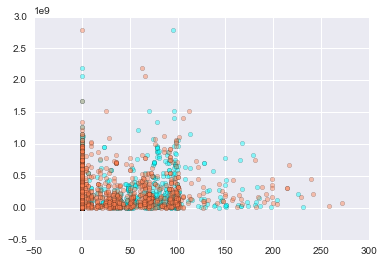

In [157]:
# Seems to be a negative correlation...
plt.scatter(movie_df.Female_Score, movie_df.Total_Gross, c = 'cyan', alpha = 0.44)
plt.scatter(movie_df.Male_Score, movie_df.Total_Gross, c = 'coral', alpha = 0.44)

### Director Scores

Same thing as Actor Scores

In [159]:
url = 'http://www.imdb.com/list/ls000000757/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

divs = soup.findAll('div', class_ = 'info')
women = [div.find('a').text for div in divs]

dirs = [(rank, nm.strip()) for rank, nm in enumerate(women)]


dirs = {director: rank for rank, director in dirs}
dirs

{u'Ang Lee': 8,
 u'Christopher Nolan': 10,
 u'Clint Eastwood': 1,
 u'Danny Boyle': 13,
 u'David Cronenberg': 18,
 u'David Fincher': 4,
 u'David Lynch': 17,
 u'Gus Van Sant': 22,
 u'James Cameron': 9,
 u'Joel Coen': 2,
 u'Jonathan Demme': 21,
 u'Judd Apatow': 24,
 u'Kathryn Bigelow': 12,
 u'Martin Scorsese': 11,
 u'Michael Mann': 14,
 u'Oliver Stone': 19,
 u'Paul Thomas Anderson': 15,
 u'Peter Jackson': 5,
 u'Quentin Tarantino': 7,
 u'Ridley Scott': 16,
 u'Ron Howard': 6,
 u'Sofia Coppola': 20,
 u'Steven Soderbergh': 3,
 u'Steven Spielberg': 0,
 u'Wes Anderson': 23}

In [162]:
def get_director_score(dir_lst):
    return sum([25-dirs[director] if director in dirs else 0 for director in dir_lst])
movie_df['Director_Score'] = movie_df.Directors.map(get_director_score)


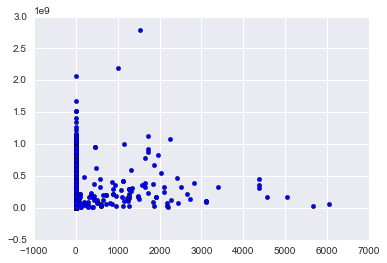

In [164]:
plt.scatter(movie_df.Director_Score*movie_df.Total_Actor_Score, movie_df.Total_Gross)  #nada..

In [165]:
# More Features??

In [175]:
# Get Rid of Studio

### Production Budget!

In [9]:
# NEED PRODUCTION BUDGET

url = 'http://www.the-numbers.com/movie/budgets/all'
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'lxml')

chart_div = soup.find('div', id='page_filling_chart')
data_table = chart_div.findChild('center').find('table')


In [17]:
movie_budgets = {}
for row in data_table.findAll('tr'):
    if not len(row.findAll('td')) < 3:
        movie = row.findAll('td')[2].text
        budget = row.findAll('td')[3].text
        movie_budgets[movie] = budget


In [18]:
missing_budget = []
for mov in movie_df.Title:
    if not mov in movie_budgets:
        print mov, 'not in budget data'
        missing_budget.append(mov)
    


Rocky IV not in budget data
Annapolis not in budget data
The Boxer not in budget data
Girlfight not in budget data
Tyson not in budget data
The Twilight Saga: Breaking Dawn Part 2 not in budget data
The Twilight Saga: Breaking Dawn Part 1 not in budget data
Cinderella (2015) not in budget data
Ghosts of Girlfriends Past not in budget data
Always not in budget data
Her (2013) not in budget data
Beautiful Creatures (2013) not in budget data
Sleeping with the Enemy not in budget data
Sliver not in budget data
Perfect Stranger not in budget data
The Nutty Professor (1996) not in budget data
The Nutty Professor II: The Klumps not in budget data
Hairspray (2007) not in budget data
DodgeBall: A True Underdog Story not in budget data
Norbit not in budget data
Tyler Perry's Madea Goes to Jail not in budget data
The Santa Clause 3: The Escape Clause not in budget data
Tyler Perry's Madea's Family Reunion not in budget data
Tyler Perry's Madea's Big Happy Family not in budget data
Just Friends no

In [20]:
# SO WE HAVE 650 MOVIES MISSING BUDGET INFO
# HOWEVER A LOT OF THEM ARE JUST NAMED SLIGHTLY DIFFERENTLY

len(missing_budget)

650

In [24]:
mv_budget_ser = pd.Series(movie_budgets)
mv_budget_ser.index[mv_budget_ser.index.str.contains('Hairspray')]


Index([u'Hairspray'], dtype='object')

In [36]:
from fuzzywuzzy import fuzz, process

In [ ]:
# DON'T RUN THIS

# THESE ARE GOING TO BE FUZZY INTERPERTATION OF MATCHED TITLES

#matches = []

In [40]:
# WE ARE GOING TO FIND THEM USING FUZZYWUZZY 

remaining = filter(lambda m: m not in [match[0] for match in matches], missing_budget)
print len(remaining)
n = 1
for mv in remaining:
    print n
    n+=1
    matches.append((mv, process.extractOne(mv, movie_budgets.keys())))

408
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [53]:
good_matches = filter(lambda m: m[1][1]>=90, matches)
# not bad
print len(good_matches)

# so on the left is a movie in our df
# on the right is our budget dictionaries best match
good_matches[:10]

478


[(u'Rocky IV', (u'Rocky', 90)),
 (u'Annapolis', (u'Anna', 90)),
 (u'The Twilight Saga: Breaking Dawn Part 2',
  (u'The Twilight Saga: Breaking Dawn, Part 2', 99)),
 (u'The Twilight Saga: Breaking Dawn Part 1',
  (u'The Twilight Saga: Breaking Dawn, Part 1', 99)),
 (u'Cinderella (2015)', (u'Cinderella', 90)),
 (u'Ghosts of Girlfriends Past', (u'Ghost', 90)),
 (u'Always', (u'Everything You Always Wanted to Know', 90)),
 (u'Her (2013)', (u'Her', 90)),
 (u'Beautiful Creatures (2013)', (u'Beautiful Creatures', 95)),
 (u'The Nutty Professor (1996)', (u'The Nutty Professor', 95))]

In [54]:
def eval_matches():
    idxs = []
    for match in good_matches:
        print match
        evaluation = input('1 or 0:')
        if not evaluation:
            good_matches.remove(match)
            

In [59]:
# yes i did this by hand shmeh
eval_matches()

(u'The Twilight Saga: Breaking Dawn Part 2', (u'The Twilight Saga: Breaking Dawn, Part 2', 99))
1 or 0:1
(u'The Twilight Saga: Breaking Dawn Part 1', (u'The Twilight Saga: Breaking Dawn, Part 1', 99))
1 or 0:1
(u'Cinderella (2015)', (u'Cinderella', 90))
1 or 0:1
(u'Always', (u'Everything You Always Wanted to Know', 90))
1 or 0:0
(u'Beautiful Creatures (2013)', (u'Beautiful Creatures', 95))
1 or 0:1
(u'The Nutty Professor (1996)', (u'The Nutty Professor', 95))
1 or 0:1
(u'The Nutty Professor II: The Klumps', (u'Nutty Professor II: The Klumps', 95))
1 or 0:1
(u'Hairspray (2007)', (u'Hairspray', 90))
1 or 0:1
(u'DodgeBall: A True Underdog Story', (u'Dodgeball: A True Underdog Story', 100))
1 or 0:1
(u'The Santa Clause 3: The Escape Clause', (u'The Santa Clause', 90))
1 or 0:0
(u"Tyler Perry's Madea's Big Happy Family", (u"Madea's Big Happy Family", 90))
1 or 0:1
(u'Catch Me If You Can', (u'Catch Me if You Can', 100))
1 or 0:1
(u'Knock Knock', (u'Knock Off', 95))
1 or 0:0
(u'Prince of Pers

In [89]:
len(good_matches)

369

In [91]:
match_dic = {match[0]: match[1][0] for match in good_matches}
len(match_dic)

369

In [92]:

# Ok translate them over to our budgt dic and then from there to our df

# Add the budgets we have
movie_df['Production_Budget'] = [movie_budgets[mv] if mv in movie_budgets else np.nan for mv in movie_df.Title]

df_titles = [t[0] for t in good_matches]

# Translate the titles we are missing with good_matches then insert the budget data
movie_df.loc[movie_df.Title.isin(df_titles), 'Production_Budget'] = [movie_budgets[match_dic[title]] for title in df_titles]


In [25]:
# change production budget to dollars
def str_to_float(string):
    '''
    Convert string to floats
    eg str_to_float('2.25') -> 2.25
        str_to_float('0.234') --> 0.234
        str_to_float('-213') --> -213
    '''
    pos = True
    d_point = -1
    exp = 0
    # get rid of commas, and dollar signs
    string = string.replace(',', '').replace('$', '')
    if string.startswith('-'):
        pos = False
        string = string[1:]
    d_point = string.find('.')
    if d_point >=0:
        string = string.replace(string[d_point], '')
        exp = np.abs(d_point - len(string))
    num = int(string)
    num = float(num)/10**exp
    if pos == False:
        return -num
    else:
        return num
    
movie_df.fillna('0', inplace = True)

In [102]:
movie_df['Production_Budget'] = movie_df.Production_Budget.map(str_to_float)


In [105]:
# FILL THE NAS WITH THE MEDIAN VALUE OF 35 MIL

movie_df.Production_Budget.replace(0, movie_df.Production_Budget.median(), inplace=True)

In [107]:
movie_df.isnull().sum()

Title                   0
Release_Date            0
Release_Month           0
Genres                  0
Actors                  0
Directors               0
Studio                  0
Runtime                 0
Foreign_Gross           0
Domestic_Gross          0
Total_Gross             0
Opening_Week_Gross      0
Opening_Num_Theaters    0
Total_Theaters          0
Male_Score              0
Female_Score            0
Total_Actor_Score       0
Director_Score          0
Production_Budget       0
dtype: int64

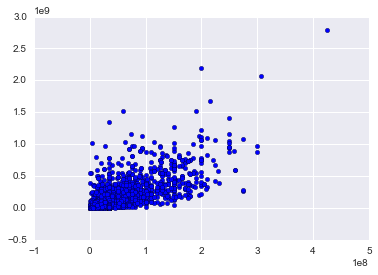

In [115]:
plt.scatter(movie_df.Production_Budget, movie_df.Total_Gross)

In [27]:
# WELL I'M AN IDIOT AND DIDN'T SAVE THOSE MATCHES SO NOW I JUST HAVE TO GO BACK AND SCRAPE WIKIPEDIA


wiki_url = 'https://en.wikipedia.org/wiki/'
wiki_budgets = {}
budget_re = re.compile(r'Budget\s*?(\$[^\*)\[')

n = 0
errs = []
print len(movie_df[movie_df.Production_Budget == 35000000].Title.values)
for title in movie_df[movie_df.Production_Budget == 35000000].Title.values:
    n+=1
    print n
    resp = requests.get(wiki_url + title)
    if not resp.ok:
        errs.append(title)
        continue
    soup = BeautifulSoup(resp.text, 'lxml')
    try:
        tbl = soup.find('table', class_ = 'infobox vevent')
        wiki_budgets[title] = re.findall(budget_re, tbl.text)[0]
    except:
        errs.append(title)

    
    

348
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [97]:
# just get the dollar amount

new_vals = [str(re.findall(r'(\$[0-9]+)', val)[0]) for val in wiki_budgets.values()]
wiki_budgets = dict(zip(wiki_budgets.keys(), [str_to_float(val)*1000000 for val in new_vals]))

In [99]:
movie_df.loc[movie_df.Title.isin(wiki_budgets.keys()), 'Production_Budget'] = wiki_budgets.values()

In [102]:
movie_df[movie_df.Production_Budget==35000000].shape

(282, 19)

In [103]:
# SAVING IT TO GDMF PICKLE FILE!

with open('Pickle_Files/movie_df.pkl','wb') as f:
    pickle.dump(movie_df, f, -1)
    

In [10]:
# WRITE GNR_DUMMIES

with open('Pickle_Files/gnr_dummies.pkl', 'wb') as f:
    pickle.dump(gnr_dummies, f, -1)

In [3]:
# LOAD PICKLE
movie_df = None
with open('movie_df.pkl', 'rb') as f:
    movie_df = pickle.load(f)